# LGMVIP - Data Analytics virtual internship
## Task 2- Intermediate
## Task- Prediction using Decision Tree  Algorithm
## Author- Padmini Jain

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Load the data

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### The "id" column is not important

In [4]:
df1 = df.drop('Id', axis=1, inplace=False)
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df1.shape # there are 150 rows and 5 columns

(150, 5)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### There is not null value in the dataset

In [8]:
df1['Species'].value_counts()  # There are 3 different species in the dataset

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Data Visualization

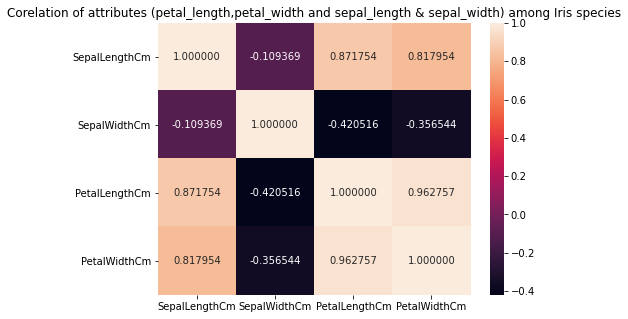

In [11]:
plt.subplots(figsize = (7,5))
sns.heatmap(df1.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal_length,petal_width and sepal_length & sepal_width) among Iris species")
plt.show()

#### It shows the high correlation between petal_lenght and petal_width

<AxesSubplot:ylabel='Species'>

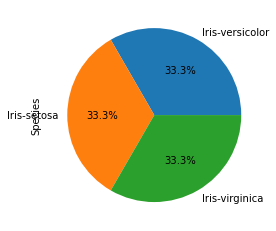

In [12]:
df1['Species'].value_counts().plot(kind='pie', autopct="%.1f%%")

#### It shows that we have equal percentage of all the 3 species in the dataset.

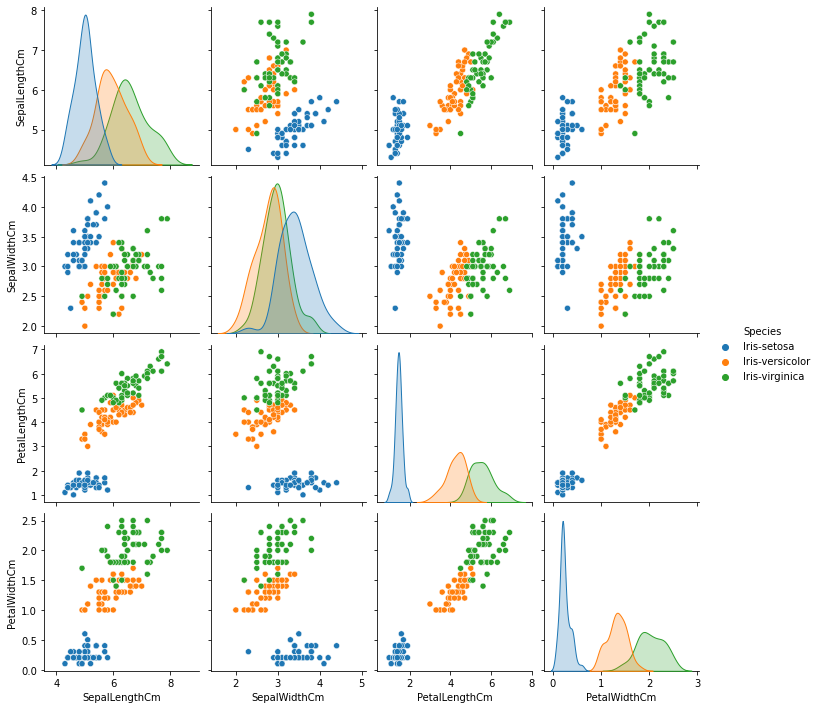

In [13]:
sns.pairplot(df1, hue='Species')

### Split the data into test and train set

In [14]:
X = df1.drop(["Species"], axis=1)
y = df1["Species"]

In [15]:
train , test = train_test_split(df1,test_size=0.5,random_state=0)
print('shape of training data : ', train.shape)
print('shape of testing data', test.shape)

shape of training data :  (75, 5)
shape of testing data (75, 5)


In [16]:
train_x = train.drop(columns=['Species'],axis=1)
train_y = train['Species']

test_x = test.drop(columns=['Species'],axis=1)
test_y = test['Species']

In [17]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
3,4.6,3.1,1.5,0.2
149,5.9,3.0,5.1,1.8
98,5.1,2.5,3.0,1.1
6,4.6,3.4,1.4,0.3
68,6.2,2.2,4.5,1.5


In [18]:
train_y.head()

3          Iris-setosa
149     Iris-virginica
98     Iris-versicolor
6          Iris-setosa
68     Iris-versicolor
Name: Species, dtype: object

### Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier()
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [20]:
y_predict = model.predict(test_x)

In [21]:
prediction = model.predict(test_x)
print("Accuracy:", accuracy_score(test_y,prediction))

Accuracy: 0.96


### Model Visualization

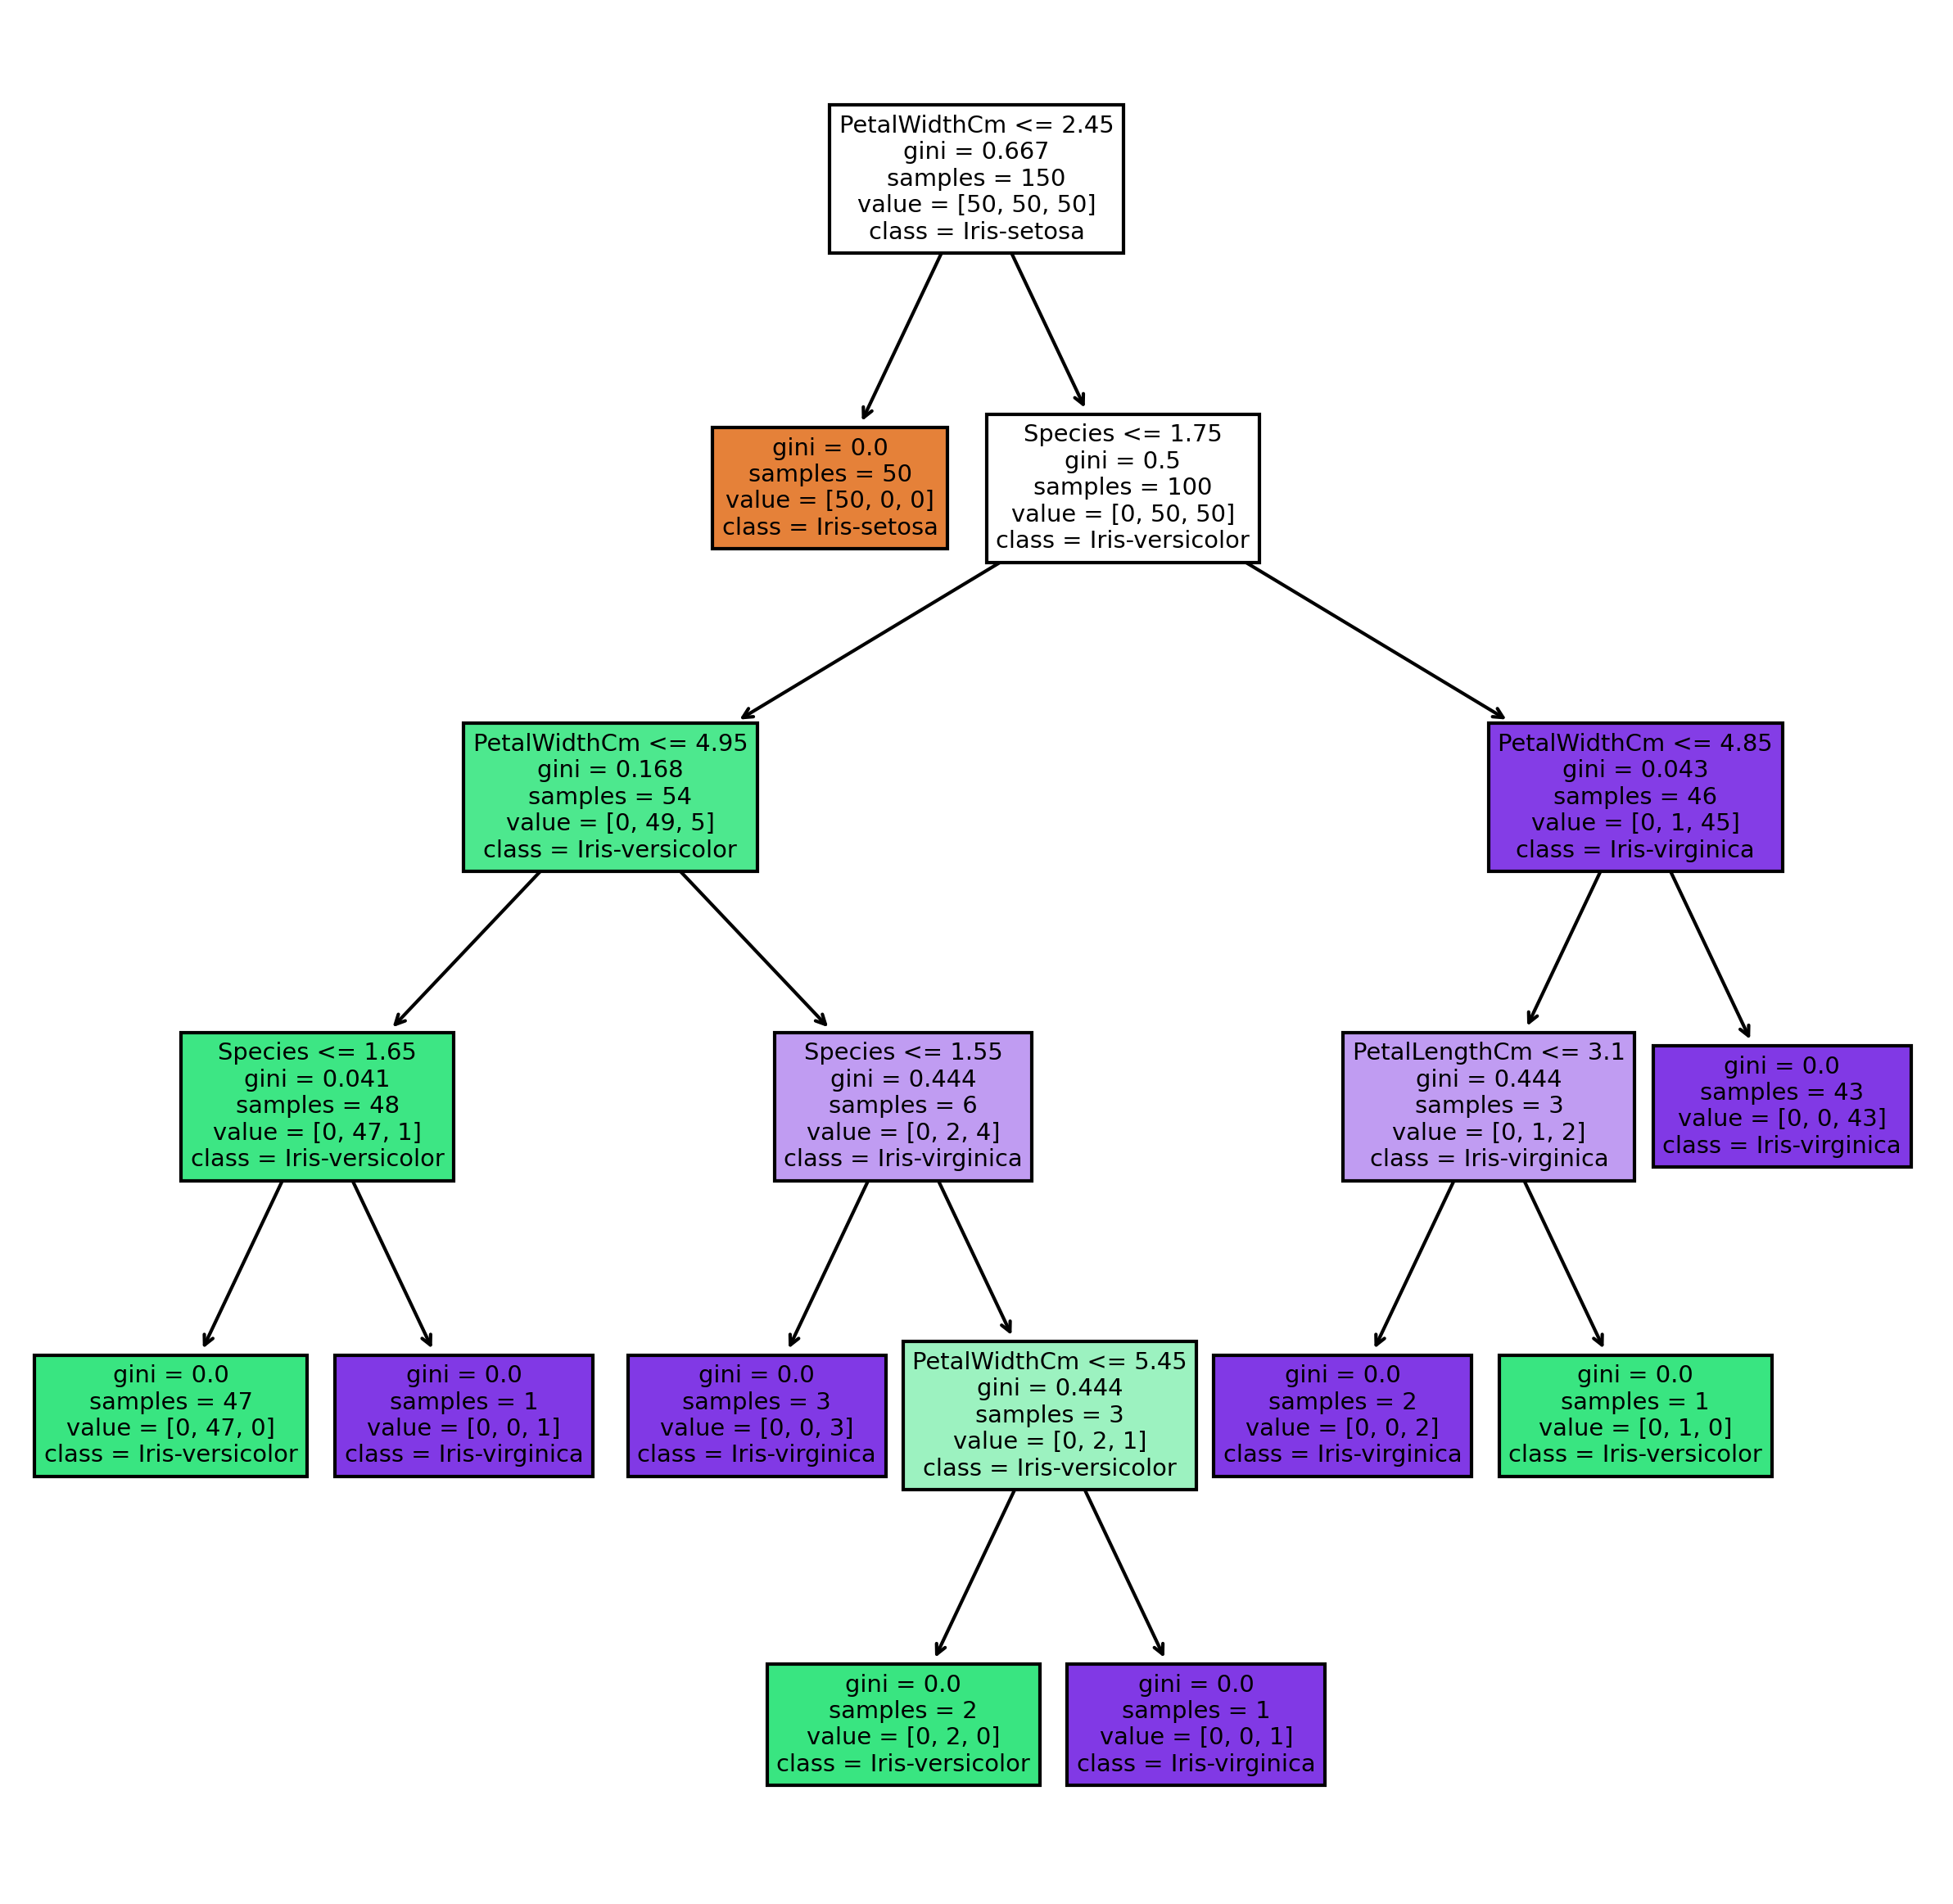

In [22]:
#making an instance of the model
features = df1.columns[1:5]
classes = df1["Species"].unique().tolist()
model.fit(X,y)
#setting dpi=300 to make image more clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10), dpi = 300)
tree.plot_tree(model, feature_names=features, class_names=classes, filled = True);

### Check the model for new values

In [23]:
x_data = [[8.2,7.1,9.6, 4.0]]
pred_new = model.predict(x_data)
pred_new

array(['Iris-virginica'], dtype=object)

#### The model predicted the new data as Iris-virginica